In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [65]:
labels = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income']

def read_file_add_labels(file_path, labels):
    return pd.read_csv(file_path, names = labels, encoding='unicode_escape')

def preprocess_data(data):
    return pd.get_dummies(data, dtype = int)

def train_test_split_data(X, y, test_sizes, random_states):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_sizes, random_state = random_states)
    return X_train, X_test, y_train, y_test

def decisionTreeClassifierModel(model, X_train, y_train, X_test, y_test):
    fitted_model = model.fit(X_train, y_train)
    y_pred = fitted_model.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    tree.plot_tree(fitted_model, feature_names = list(X.columns), filled = True, fontsize = 6, rounded = True)
    plt.show()

def define_sc_model():
    sc = StandardScaler()
    return sc
    
def randomForestClassifierModel(rf_model, X_train, X_test, y_train, y_test):
    sc = define_sc_model()
    X_test = sc.fit_transform(X_test)
    X_train = sc.fit_transform(X_train)
    rf_model = rf_model.fit(X_train, y_train)
    rf_model.score(X_test, y_test)
    ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
    print(rf_model.feature_importances_, X.columns)
    rf_tree = rf_model.estimators_[4]
    tree.plot_tree(rf_tree)
    plt.show()

def xgBoost(xgb, X_train, X_test, y_train, y_test):
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

### 1.
Inductive reasoning is a thought process where you generalize a pattern or solution based on specific observations and patterns. The approach in programming involves examining specific instances and then developing a general rule or algorithm to handle a broader range of similar cases. And deductive reasoning is a basic aspect of logical thinking. It allows individuals to draw valid conclusions based on given premises and applies established rules/patterns to reach logical outcomes. And for examples, an example of inductive reasoning is data analysis with iterative coding. A reseraher may code data without any pre-defined sets of code to identify themes and patterns, and then refining the code after noticing these patterns. And for deductive reasoning, and example is writing a function to search for a specific number in a sorted list. This is done through a binary search algorithm and rules are established in the code to repeatedley divide the sorted list in half to find where the target value is.

### 2.

In [66]:
data = read_file_add_labels('adult.data', labels)

In [67]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [68]:
processed_adult = preprocess_data(data)

In [69]:
processed_adult.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [70]:
processed_adult.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia',
       'income_ <=50K', 'income_ >50K'],
      dtype='object', length=110)

In [71]:
# I predicted the individuals which had an annual income greater than 50k. My code below runs this.
X = processed_adult.drop(['income_ <=50K','income_ >50K'], axis = 1)
y = processed_adult.iloc[:,-1:]

### Preprocessing (What my code does)
I used one hot encoding to convert catgeorical data into numerical data. This is seen in the preprocess_data function above. I also noticed the dataset I used was missing labels, and so I added a label function above to provide labels to each column of the Adult dataset. There were no null values, missing values, or other unclean aspects of the dataset that needed preprocessing. And because of this, there wasn't much for me to preprocess.

### 3.
To tune my decision tree, I set the maximum depth of the tree to 7. I needed to find a number that would both generate an apropriate amount of tree rows and one that got the precision closest tpo 100. 7 was that number since a precision 0.88 and 0.78 is pretty close and the decision tree wont be as piled up or condensed as long as I use a small depth. And in the train test split, I had a test size of 0.3 or 30% and random state of 42.

In [72]:
X_train, X_test, y_train, y_test = train_test_split_data(X, y, 0.3, 42)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7455
           1       0.78      0.58      0.66      2314

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769



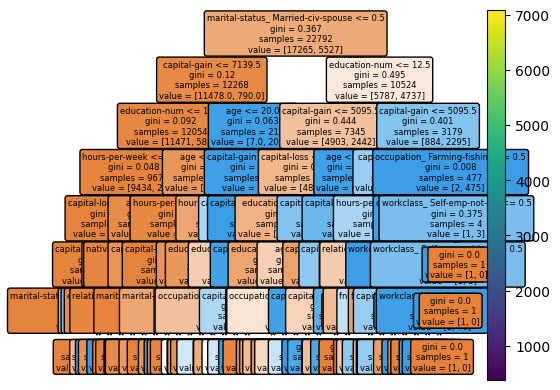

In [86]:
model = tree.DecisionTreeClassifier(max_depth = 7, random_state = 42)
decisionTreeClassifierModel(model, X_train, y_train, X_test, y_test)

### 4.
To tune my random foreat model, I set my N_estimators, or the number of estimators, to 100. And the random state remained being 42. 

/opt/homebrew/Cellar/jupyterlab/4.2.5/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[1.49419487e-01 1.53825615e-01 6.67303845e-02 8.93187232e-02
 2.76927901e-02 8.22527143e-02 2.14369127e-03 5.77021558e-03
 5.80162937e-03 7.79890235e-06 1.11515913e-02 7.00501213e-03
 8.48454050e-03 4.80650260e-03 8.15680515e-05 1.40191052e-03
 2.05398035e-03 9.17976020e-04 2.47783708e-04 6.10503825e-04
 1.77813639e-03 1.28842880e-03 2.69946256e-03 3.30025516e-03
 1.34325788e-02 3.38606656e-03 7.71302203e-03 8.93112893e-03
 3.38806249e-05 5.25686085e-03 5.42732932e-03 5.50879591e-03
 3.25643454e-04 7.57097006e-02 8.76880658e-04 1.94730628e-02
 1.39880063e-03 1.43531544e-03 2.02508677e-03 6.13351873e-03
 4.48564456e-06 7.16303104e-03 1.89474736e-02 4.54272931e-03
 3.42229905e-03 4.70441894e-03 6.72271791e-03 1.04533878e-04
 1.40140643e-02 2.96502474e-03 7.83763896e-03 4.80254848e-03
 4.63229726e-03 3.80013172e-02 1.19763050e-02 1.62087358e-03
 8.62936884e-03 4.51443572e-03 1.04632796e-02 1.20266772e-03
 2.98273445e-03 5.01069555e-03 8.04973611e-04 6.58503861e-03
 9.40538224e-03 8.369630

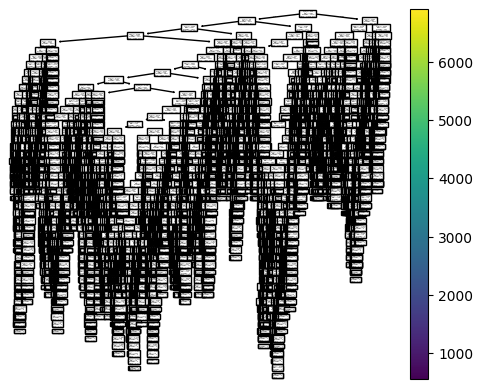

In [74]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
randomForestClassifierModel(rf, X_train, X_test, y_train, y_test)

### 5.
For the xgboost model, nothing was really tuned since no tuning was needed to produce a quality result. All I did was apply my xgboost function to create one for Adult dataset. 

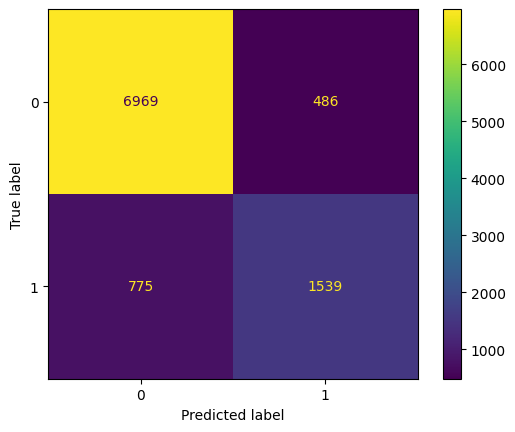

In [53]:
xgb = XGBClassifier()

xgBoost(xgb, X_train, X_test, y_train, y_test)